In [1]:
import sys

sys.path.insert(0, r'd:\_NUU\2018\machine\skulls')
import data_dictionary

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
total_time = time.time()

In [2]:
start_time = time.time()
data = data_dictionary.DataDictionary()
data.load_data(
    datafile_path='d:\\_NUU\\2018\\machine\\skulls\\init_data\\skulls.csv',
    labelfile_path="d:\\_NUU\\2018\\machine\\skulls\\init_data\\labels.csv")

print(f"{time.time() - start_time:.5} secs")

0.028923 secs


In [3]:
data.set_border()
border = data.get_border()
print(F"type:{type(border)} \t\t border.len={len(border)}")
print(border)

type:<class 'set'> 		 border.len=16
{2, 3, 13, 15, 16, 20, 27, 29, 30, 31, 34, 35, 36, 37, 39, 40}


In [4]:
data.set_link()
K = data.get_link()
K

{0: 0,
 1: 0,
 2: 1,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 1,
 14: 0,
 15: 1,
 16: 7,
 17: 0,
 18: 0,
 19: 0,
 20: 1,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 1,
 28: 0,
 29: 2,
 30: 2,
 31: 1,
 32: 0,
 33: 0,
 34: 2,
 35: 6,
 36: 5,
 37: 6,
 38: 0,
 39: 4,
 40: 1,
 41: 0}

In [5]:
noise = data.get_noise()
print(
    f"border:\t\t{border}\n"
    f"noise:\t\t{noise}\n"
)

print(f"delete noise obj from ids. \n"
      f"BEFORE: ids.len: {len(data.ids)}")

data.ids = data.ids - noise

print(f"AFTER:  ids.len: {len(data.ids)}")

print(f"reCALC: border set\n"
      f"BEFORE: len:{len(border)} border: {border}")
data.set_border()
border = data.get_border()
print(f"AFTER:  len:{len(border)} border: {border}")


border:		{2, 3, 13, 15, 16, 20, 27, 29, 30, 31, 34, 35, 36, 37, 39, 40}
noise:		{2, 34, 35, 36, 37, 39, 16, 27, 29, 30}

delete noise obj from ids. 
BEFORE: ids.len: 42
AFTER:  ids.len: 32
reCALC: border set
BEFORE: len:16 border: {2, 3, 13, 15, 16, 20, 27, 29, 30, 31, 34, 35, 36, 37, 39, 40}
AFTER:  len:5 border: {38, 40, 24, 12, 31}


In [36]:
# DEBUGGING

print(border)
print(dd[134]['nearest_opponent'])
print(dd[88]['nearest_opponent'])
print(dd[51]['nearest_opponent'])
print(dd[142]['rel'][88])
print(dd[142]['rel'][51])


{97, 65, 35, 71, 40, 11, 140, 173, 144, 115, 181, 150, 183, 121, 159}
(75, 0.01716561401460077)
(150, 0.12954538556203113)
(181, 0.11242308020125479)
0.05525968890604695
0.035294117647058976


In [37]:
def get_shell4(data_dict=None, border=None):
    import datetime    
    file = open('d:\\_NUU\\2018\\machine\\WineExp\\output_data\\shell4_border.data', mode='w')
    file.write(str(datetime.datetime.now()))
    file.write("\n\n")
    shell = set()
    
    error_file = open('d:\\_NUU\\2018\\machine\\WineExp\\output_data\\shell4_error.data', mode='w')
    error_file.write(str(datetime.datetime.now()))
    error_file.write("\n\n")
    
    c = 0   
    if not(data_dict or border):
        e = "ERROR: input error"
        # print(e)
        error_file.write(f"{e}:::\ndata_dict:{data_dict}; border:{border}")
        return set()
    
    for host_id in data_dict['ids']:
        
        file.write(f":: HOST ID {host_id} data:{dd[host_id]['data']}::\n")
        
        # get nearest opponent [<id>, <r>]
        near = data_dict[host_id]['nearest_opponent']
        
        file.write(f":: near {near} :::\n")
        
        # get friends
        friends = set()
        # stage 1: get all from class
        # for friend_id in data_dict['ids']:
        for friend_id in data_dict['ids']:  # border:
            if data_dict[host_id]['class'] == data_dict[friend_id]['class']:
                friends.add(friend_id)
        friends.discard(host_id)  # remove own id from friends  
        
        file.write(f":: f.len = {len(friends)} "
                   f"friends is subset of border? {friends <= border}::\n")
        
        # stage 2: get only in range
        friends_t = set()  # friends_in_range = set()
        # friends in radius
        for friend_id in friends:
            if \
                    data_dict[host_id]['rel'][friend_id] <= near[1] and \
                    data_dict[friend_id]['rel'][near[0]] < near[1]:
                friends_t.add(friend_id)
                
            if data_dict[host_id]['rel'][friend_id] < 10**-6:
                friends_t.add(friend_id)
        
        # del friends_t
        file.write(f":: in R friends.len {len(friends_t)} ::"
                   f"host in border? {host_id in border}\n")
        
        L = []
        for friend_id in friends:
            L.append((
                friend_id,
                data_dict[host_id]['rel'][friend_id],
                data_dict[friend_id]['rel'][near[0]],
                str(friend_id in border),
            ))
        
        L = sorted(L, key=lambda l: l[2])
        L2 = ''
        
        s = f"f_id, \t\th->f, \t\tf->o, \t\tin border?\n"
        file.write(s)
        for el in L:
            s = f"{el[0]:<5} {el[1]:16.5f}\t\t {el[2]:8.5f} {el[3]: >15} \n"
            file.write(s)
        
        friends = friends_t.copy()
        
        tmp = L[0]
        if len(friends_t):  # if in_R_f.len > 0
            if abs(data_dict[tmp[0]]['rel'][near[0]] - near[1]) < 10**-8:
                if host_id in border:
                    shell.add(host_id)
                elif tmp[0] in border:
                    shell.add(tmp[0])
                else:
                    e = f"ERROR: host in border? {host_id in border}; f[0] {tmp}\n"     
                    # print(e)
                    error_file.write(e)
            elif tmp[3] == 'False':
                e = f"ERROR: f_in_R.len={len(friends_t)} L[0]={tmp}\n"
                # print(e)
                error_file.write(e)
            else:
                shell.add(tmp[0])
                e = f"in R friends {friends_t}\n" \
                    f"host:{host_id} obj:{tmp}; f.len={len(L)} added into shell:{shell}\n\n"  # DEBU
                # print(e)
                error_file.write(e)
        else:  # if in_R_f.len = 0
            if host_id in border:
                shell.add(host_id)
                
                e = f"in_R_f.len={friends_t}, host in border:{host_id in border}" \
                    f"host:{host_id} obj:{tmp} added into shell:{shell}\n\n"  # DEBUG
                # print(e)
                error_file.write(e)
            else:
                shell.add(host_id)
                
                e = f"ERROR: host{host_id} data:{dd[host_id]['data']} " \
                    f"f_in_R.len={len(friends_t)} " \
                    f"host in border? {host_id in border}" \
                    f"but also added to shell:{shell}\n\n"
                # print(e)
                error_file.write(e)
        
        del near
        del host_id
        file.write('\n\n')
    
    file.close()
    error_file.close()
    return shell


shell4 = get_shell4(dd, border)
print('over')


over


In [41]:
print(f"{time.time() - total_time:.10} secs")
print(len(binary_dict))

19.02959347 secs
182


Формула для проверки компактности 
# $\Theta_i = \sum_{j=1}^{\mu} \frac{m_{i j}^2}{m_i^2}$, где 
### i = нормер класса, 
### j = номер группы,
### $m_i = $ число объектов в классе,
### $m_{i j} = $ число объектов j-ой группы i-го класса

In [56]:
# проверка КОМПАКТНОСТИ

# mi  число obj в классе
# mij число obj в группе
for i in [0, 1]:
    mi = sum([1 if dd[host_id]['class'] == i else 0 for host_id in dd['ids']])
    summa = 0.
    for j, g in enumerate(groups_list):
        if dd[next(iter(g))]['class'] != i:
            continue
        mij = len(g)
        summa += mij**2
    Qi = summa/(mi**2)
    print(f"class={i}, Qi={Qi:1.4}")


class=0, Qi=0.9355
class=1, Qi=0.9142


In [57]:
# ordered_list = []
# WORKING IN EACH GROUP SEPARATELY
group_etalons_list = []
for group in groups_list:
    
    group_etalons = group.copy()
    
    ordered_list = list()  # For list of elements ordered by R to nearest_opponent
    for host_id in group:
        #  ordered_list[ <id>, <R> <etalon> ] :
        #                <id>     - id of group element;
        #                <R>      - R to nearest_element;  # for sorting
        #                <etalon> - is this obj etalon?
        ordered_list.append([ 
            host_id, 
            dd[host_id]['nearest_opponent'][1], 
            1 
        ])
    
    # Sorting all elements by R to nearest_opponent
    ordered_list = sorted(ordered_list, key=lambda x: x[1], reverse=False)

    # WORKING ON EACH ELEMENT OF GROUP
    for n, item in enumerate(ordered_list):
        
        # temporary delete from group_etalons  # ordered_list[n][2] = 0
        print(f"del [{item[0]}]", end="\t")
        group_etalons.discard(item[0])
        
        # CHECK for errors on change etalon_label
        for notetalon_id in group - group_etalons:
            relation_table = []
            for other_id in dd['ids'] - \
                    (group - group_etalons) - \
                    {notetalon_id, }:
                # other_id: any, except notetalon objects
                relation_table.append([                 # 
                    other_id,                           # id 
                    dd[notetalon_id]['rel'][other_id],  # R to other_id
                ])
            minimum = min(relation_table, key=lambda x: x[1])
            
            if dd[notetalon_id]['class'] != dd[minimum[0]]['class']:
                print(
                    f"ERROR: n{n} NotEtalon{notetalon_id}, "
                    f"minimum{minimum}", end='\t')
                group_etalons.add(item[0])
            else: 
                print('!', end='')
    
    group_etalons_list.append(group_etalons)        
    print(f"\nGROUP ETALONS: {group_etalons}")

del [40]	ERROR: n0 NotEtalon40, minimum[150, 0.034331228029202326]	del [11]	!del [35]	ERROR: n2 NotEtalon35, minimum[159, 0.04325129755839056]	!del [97]	!!del [65]	!!!del [87]	!!!!del [6]	!ERROR: n6 NotEtalon97, minimum[183, 0.04705882352941104]	!!!del [61]	!!!!!del [15]	!!!!!!del [38]	!!!!!!!del [84]	!!!!!!!!del [19]	!!!!!!!!!del [0]	!!!!!!!!!!del [51]	!!!!!!!!!!!del [13]	!!!!!!!!!!!!del [81]	!!!!!!!!!!!!!del [59]	!!!!!!!!!!!!!!del [8]	!!!ERROR: n17 NotEtalon38, minimum[159, 0.07720238087298073]	!!!!!!!!!!!del [88]	!!!!!!!!!!!!!!!del [86]	!!!!!!!!!!!!!!!ERROR: n19 NotEtalon61, minimum[173, 0.071776909521687]	del [33]	!!!!!!!!!!!!!!!!del [44]	!!!!!!!!!!!!!!!!!del [72]	!!!!!!!!!!!!!!!!!!del [30]	!!!!!!!!!!!!!!!!!!!del [34]	!!!!!!!!!!!!!!!!!!!!del [21]	!!!!!!!!!!!!!!!!!!!!!del [37]	!!!!!!!!!!!!!!!!!!ERROR: n26 NotEtalon84, minimum[144, 0.08582807007300573]	!!!del [23]	!!!!!!!!!!!!!!!!!!!!!!del [5]	!!!!!!!!!!!!!!!!!!!!!!!del [4]	!!!!!!!!!!!!!!!!!!!!!!!!del [36]	!!!!!!!!!!!!!!!!!!!!!!!!!de

In [58]:
group_etalons_list

[{6, 8, 9, 35, 37, 40, 86},
 {121, 122, 140, 150, 183},
 {144},
 {71},
 set(),
 set()]

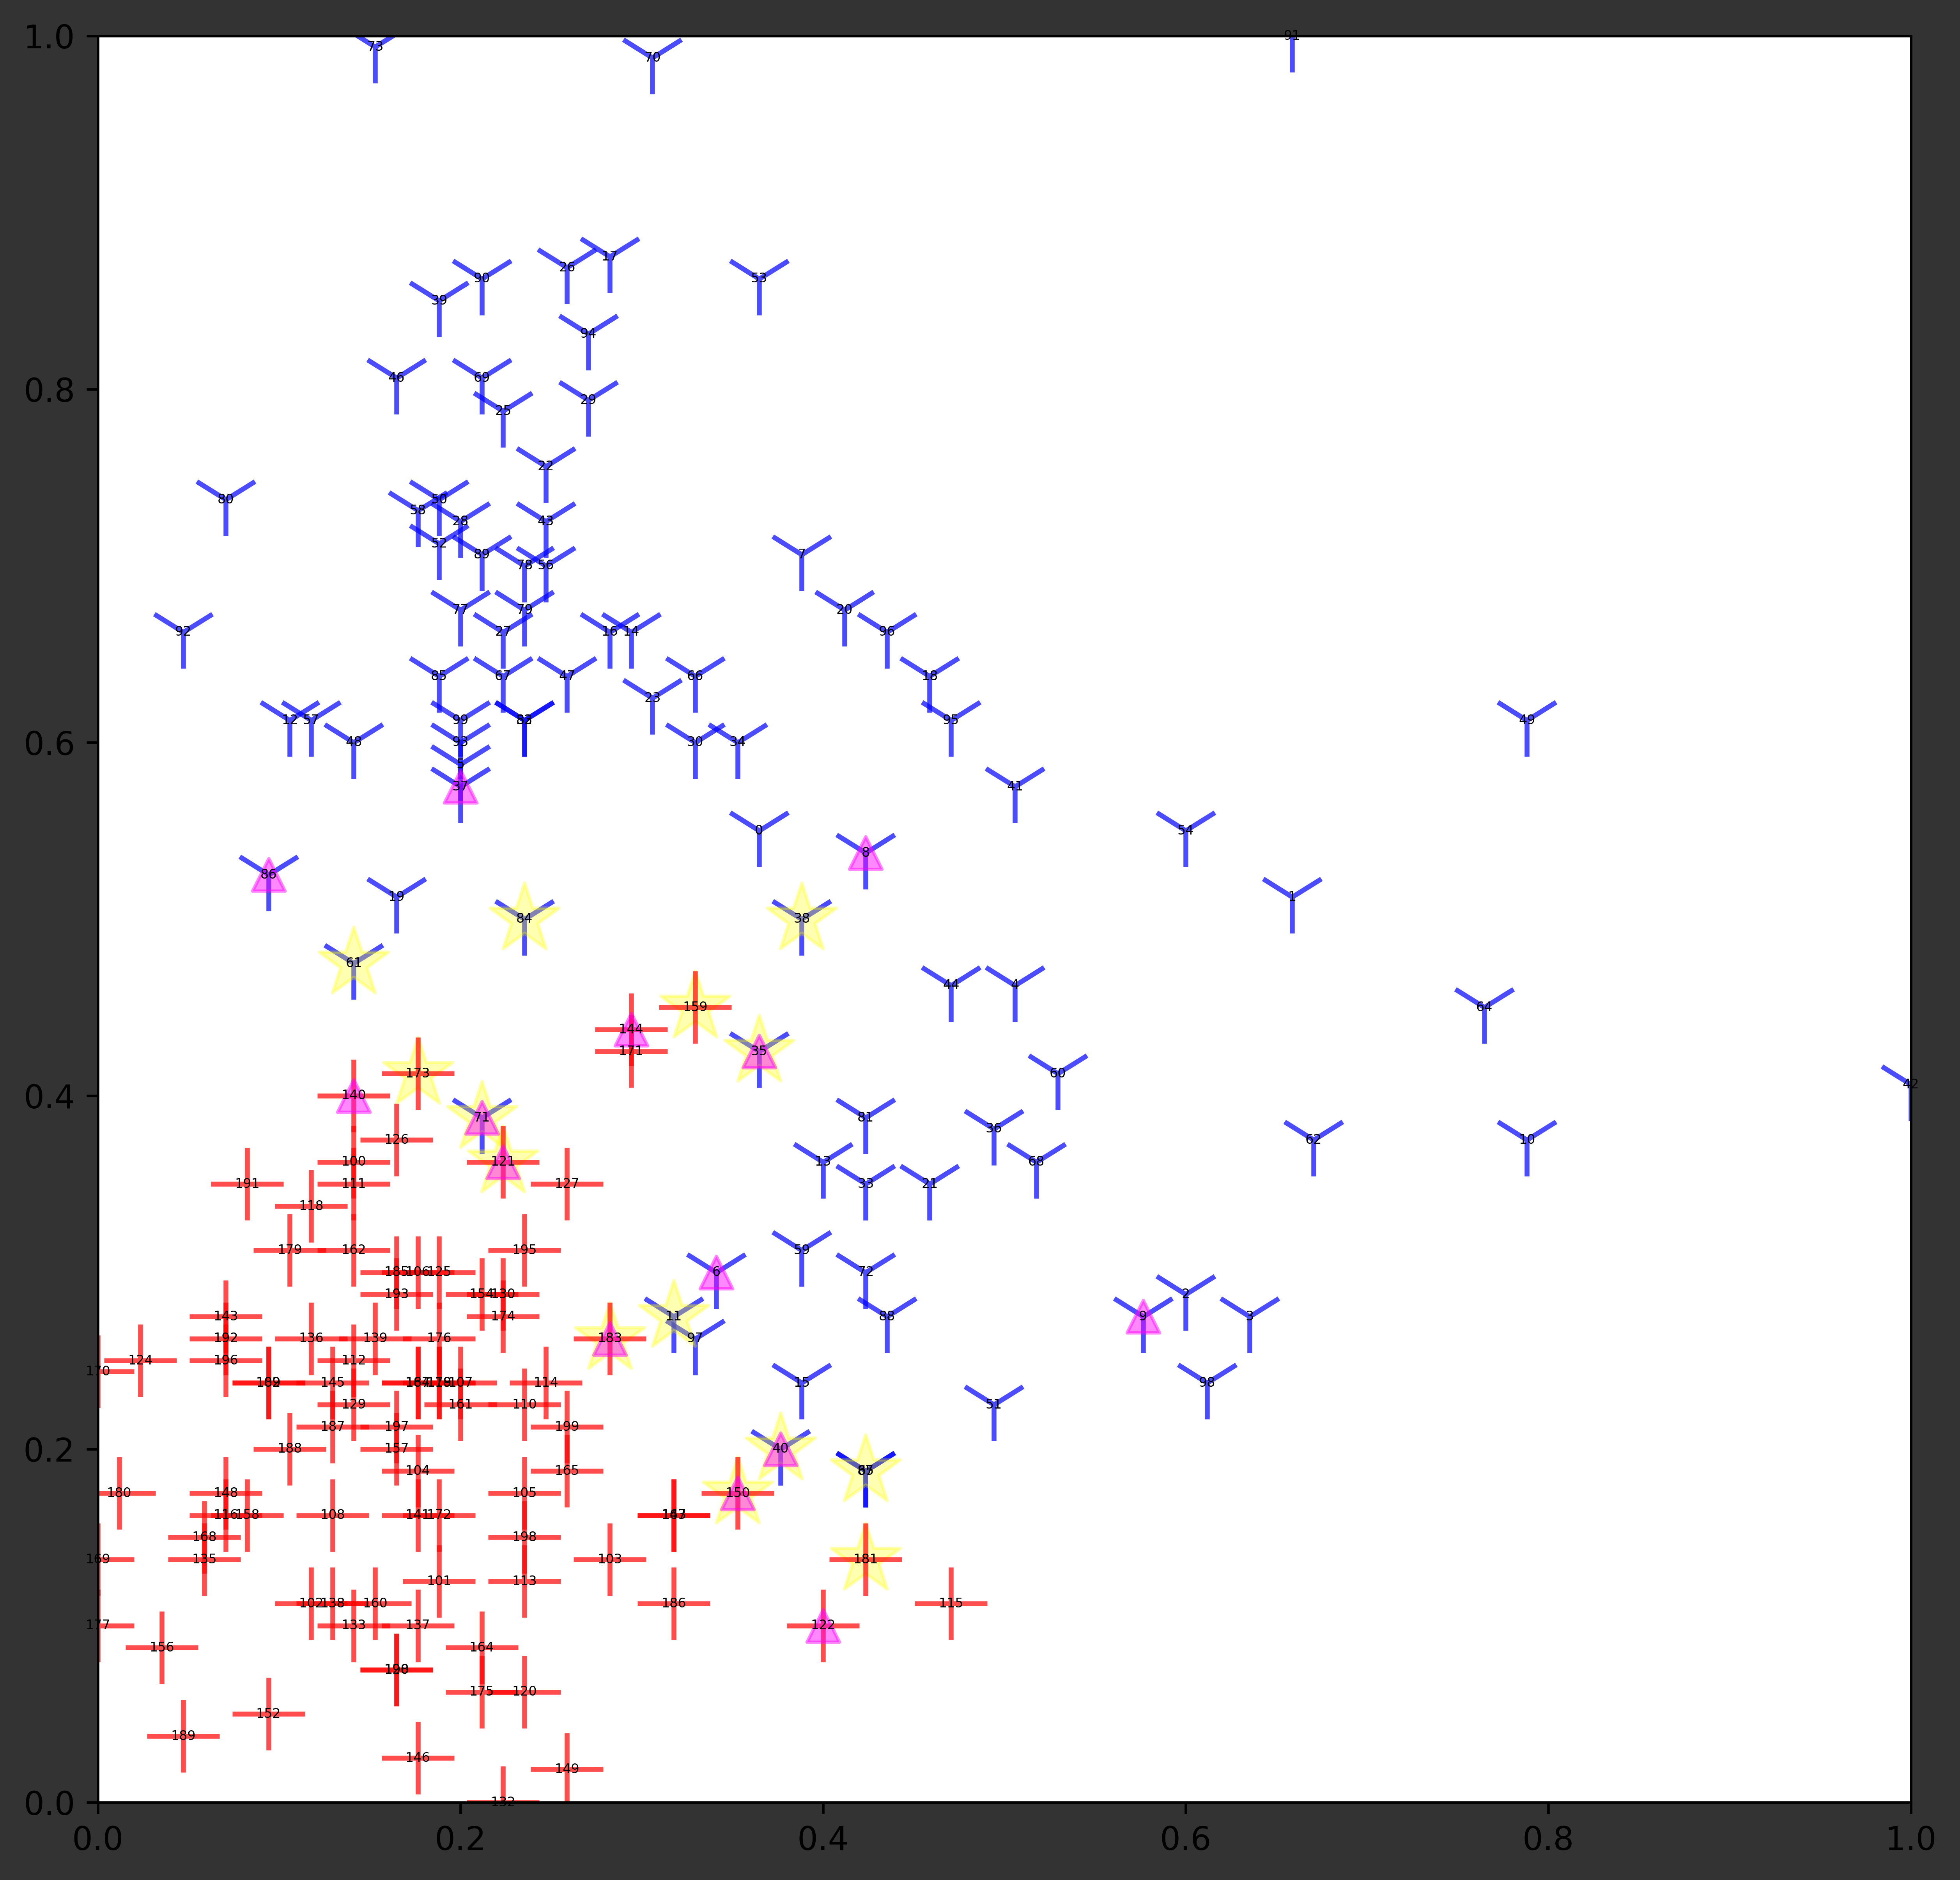

In [59]:
# НАРИСУЕМ ПЛОТ С ВЫДЕЛЕНИЕМ SHELL объектов
L = list()
plt.figure(num=1, figsize=(10, 10), dpi=600, facecolor='#333333', edgecolor='y')
for el in sorted(dd['ids']):
    """ <f1>, <f2>, <class>, <id> """
    L.append(dd[el]['data'][:])    # <f1>, <f2>
    L[-1].append(dd[el]['class'])  # <class>
    L[-1].append(el)               # <id>
    
frame = np.array(L).transpose()
# <f1>1     <f1>2       <f1>3       
# <f2>1     <f2>2       <f2>3           
# <cl>1     <cl>2       <cl>3    
# <id>1     <id>2       <id>3       
t = list()

for el in shell4:
    t.append(float(el))

# frame0 = np.ma.masked_equal(frame[2], 0, copy=True)
mask = frame[2] == 0.  # class = 0
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Blue', marker='1', alpha=.7, label='Class 0', s=500)

# np.isin(element, list(test_set))

mask = np.isin(frame[3], t)  # and frame[2] == 0
# frame0 = frame[3] in t and frame[2] == 0  # shell obj of class 0
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Yellow', marker='*', alpha=.3, label='Class 0', s=500)


mask = frame[2] == 1
plt.scatter(frame[0][mask], frame[1][mask], 
            c='Red', marker='+', alpha=.7, label='Class 1', s=500)
# frame0 = frame[3] in shell4 and frame[2] == 1  # shell obj of class 1
# plt.scatter(frame[0][frame0], frame[1][frame0], 
#             c='Red', marker='*', alpha=.7, label='Class 0', s=500)

plt.xlim(0, 1)
plt.ylim(0, 1)

for item in L:
    # ax.annotate(str(item[3]), (item[0], item[1]), size=15, ha="center", )
    plt.text(x=item[0], y=item[1], s=item[3], fontsize=4, 
             horizontalalignment='center',
             verticalalignment='center',
             color='Black',
             )

# SELECT ETALON OBJECTS
etalons = []
for group in group_etalons_list:
    for el in group:
        etalons.append(float(el))
    
mask = np.isin(frame[3], etalons) 
plt.scatter(frame[0][mask], frame[1][mask], 
            c='#FF00FF77', marker='^', label='Class 0', s=100)

plt.savefig(
    'd:\\_NUU\\2018\\machine\\WineExp\\output_data\\fig_etalon.pdf', 
    dpi=600,
)    
plt.show()

In [ ]:
print(f"{time.time() - total_time:.10} secs")